In [1]:
!pip install torch torchvision torchaudio

In [2]:
!pip install opencv-python

In [3]:
!pip install ultralytics

Processing frame_0000.jpg_frame1.png...

0: 192x640 1 train, 3 traffic lights, 585.1ms
Speed: 29.3ms preprocess, 585.1ms inference, 17.1ms postprocess per image at shape (1, 3, 192, 640)


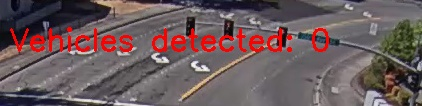

Processing frame_0001.jpg_frame1.png...

0: 192x640 3 cars, 1 truck, 3 traffic lights, 491.9ms
Speed: 2.1ms preprocess, 491.9ms inference, 1.1ms postprocess per image at shape (1, 3, 192, 640)


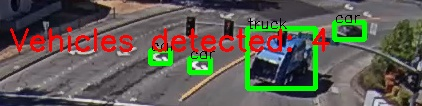

Processing frame_0002.jpg_frame1.png...

0: 192x640 3 traffic lights, 519.7ms
Speed: 1.6ms preprocess, 519.7ms inference, 1.7ms postprocess per image at shape (1, 3, 192, 640)


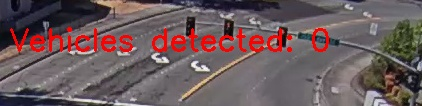

Processing frame_0003.jpg_frame1.png...

0: 192x640 2 cars, 3 traffic lights, 487.8ms
Speed: 1.7ms preprocess, 487.8ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 640)


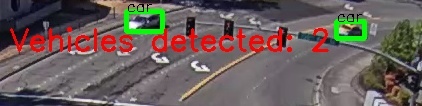

Processing frame_0004.jpg_frame1.png...

0: 192x640 3 cars, 3 traffic lights, 415.4ms
Speed: 1.3ms preprocess, 415.4ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 640)


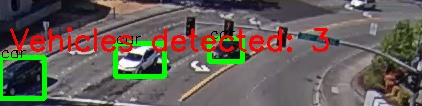

Processing frame_0005.jpg_frame1.png...

0: 192x640 6 cars, 1 truck, 3 traffic lights, 402.9ms
Speed: 2.3ms preprocess, 402.9ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 640)


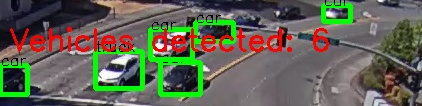

Processing frame_0006.jpg_frame1.png...

0: 192x640 3 cars, 1 truck, 2 traffic lights, 388.4ms
Speed: 4.5ms preprocess, 388.4ms inference, 1.1ms postprocess per image at shape (1, 3, 192, 640)


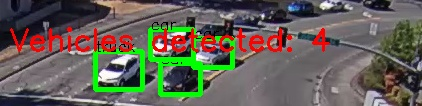

Processing frame_0007.jpg_frame1.png...

0: 192x640 6 cars, 2 traffic lights, 395.7ms
Speed: 1.6ms preprocess, 395.7ms inference, 0.8ms postprocess per image at shape (1, 3, 192, 640)


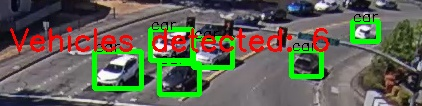

Processing frame_0008.jpg_frame1.png...

0: 192x640 3 cars, 3 traffic lights, 425.4ms
Speed: 2.3ms preprocess, 425.4ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 640)


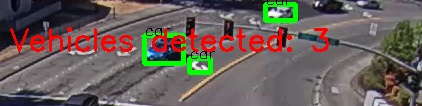

Processing frame_0009.jpg_frame1.png...

0: 192x640 1 car, 1 truck, 3 traffic lights, 404.5ms
Speed: 1.6ms preprocess, 404.5ms inference, 0.8ms postprocess per image at shape (1, 3, 192, 640)


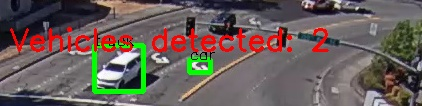

Processing frame_0010.jpg_frame1.png...

0: 192x640 5 cars, 1 train, 3 traffic lights, 425.4ms
Speed: 1.7ms preprocess, 425.4ms inference, 1.1ms postprocess per image at shape (1, 3, 192, 640)


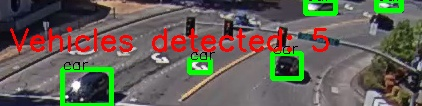

Processing frame_0011.jpg_frame1.png...

0: 192x640 5 cars, 3 traffic lights, 387.8ms
Speed: 1.7ms preprocess, 387.8ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 640)


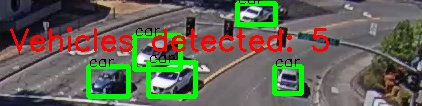

Processing frame_0012.jpg_frame1.png...

0: 192x640 3 cars, 1 train, 1 truck, 2 traffic lights, 392.7ms
Speed: 1.2ms preprocess, 392.7ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 640)


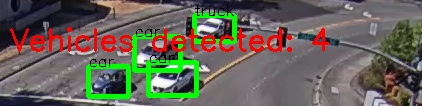

Processing frame_0013.jpg_frame1.png...



KeyboardInterrupt: 

In [5]:
import cv2
import torch
import os
from ultralytics import YOLO
from IPython.display import display, Image  # For inline display

# Load YOLOv8 model (pre-trained on COCO dataset)
model = YOLO("yolov8x.pt")  # Use a larger model for better detection

# Define input path
inputPath = "../Data/f1"

# COCO class IDs for vehicles
vehicle_classes = [2, 3, 5, 7]  # car, motorcycle, bus, truck

# Function to compute IoU
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Function to filter overlapping boxes
def filter_overlapping_boxes(boxes, iou_threshold=0.5):
    filtered_boxes = []
    for box in boxes:
        keep = True
        for filtered_box in filtered_boxes:
            if compute_iou(box.xyxy[0].tolist(), filtered_box.xyxy[0].tolist()) > iou_threshold:
                keep = False
                break
        if keep:
            filtered_boxes.append(box)
    return filtered_boxes

# Function to detect vehicles in an image and display the result
def detectVehicles(filename):
    global model, inputPath
    img_path = os.path.join(inputPath, filename)
    img = cv2.imread(img_path)  # Read the image
    
    # Perform object detection with adjusted confidence and NMS thresholds
    results = model(img, conf=0.4, iou=0.5)[0]  # Adjust thresholds
    
    # Filter overlapping boxes
    filtered_boxes = filter_overlapping_boxes(results.boxes)
    
    vehicle_count = 0  # Counter for vehicles
    for box in filtered_boxes:
        class_id = int(box.cls[0])  # Get class ID
        if class_id in vehicle_classes:  # Check if it is a vehicle
            vehicle_count += 1  # Increment count
            label = model.names[class_id]  # Get label name
            top_left = (int(box.xyxy[0][0]), int(box.xyxy[0][1]))
            bottom_right = (int(box.xyxy[0][2]), int(box.xyxy[0][3]))
            img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)  # Draw bounding box
            img = cv2.putText(img, label, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)  # Draw label
    
    # Display vehicle count on the image
    text_position = (10, 50)
    img = cv2.putText(img, f'Vehicles detected: {vehicle_count}', text_position, 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Save the image temporarily
    output_path = "temp_output.jpg"
    cv2.imwrite(output_path, img)
    
    # Display the image inline using IPython.display
    display(Image(filename=output_path))

# Process all images in the input directory
for filename in os.listdir(inputPath):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        print(f"Processing {filename}...")
        detectVehicles(filename)  # Detect vehicles and display the image

print("Done!")

In [3]:
temp=0
l=[10,50,40,50,10,40,45,9,20,30,40,5,30,14,67,15,25, 30,40,80,45]

    
start1=0
start2=30
start3=60
start4=90

t1=30
t2=30
t3=30
t4=30
c1=0
c2=0
c3=0
c4=0
while(True):
    
    for i in range(1,t1+1):
        print(i)
        if((start4+t4+30)%120==i):
            c4=l[temp]
            temp+=1
            print("Iamge")
        if((start3+t3+30)%120==i):
            c3=l[temp]
            temp+=1
            print("Iamge")
        if((start2+t2+30)%120==i):
            c2=l[temp]
            temp+=1
            print("Iamge")
    
    for i in range(t1+1,t1+t2+1):
        print(i-t1)
        if((start4+t4+30)%120==i):
            c4=l[temp]
            temp+=1
            print("Iamge")
        if((start3+t3+30)%120==i):
            c3=l[temp]
            temp+=1
            print("Iamge")
        if((start1+t1+30)%120==i):
            c1=l[temp]
            temp+=1
            print("Iamge")
    for i in range(t1+t2+1,t1+t2+t3+1):
        print(i-t1-t2)
        if((start4+t4+30)%120==i):
            c4=l[temp]
            temp+=1
            print("Iamge")
        if((start2+t2+30)%120==i):
            c2=l[temp]
            temp+=1
            print("Iamge")
        if((start1+t1+30)%120==i):
            c1=l[temp]
            temp+=1
            print("Iamge")
    for i in range(t1+t2+t3+1,t1+t2+t3+t4+1):
        print(i-t1-t2-t3)
        if((start1+t1+30)%120==i):
            c1=l[temp]
            temp+=1
            print("Iamge")
        if((start3+t3+30)==i):
            c3=l[temp]
            temp+=1
            print("Iamge")
        if((start2+t2+30)%120==i):
            c2=l[temp]
            temp+=1
            print("Iamge")
            
    t1=(c1*120)//(c1+c2+c3+c4)
    t2=(c2*120)//(c1+c2+c3+c4)
    t3=(c3*120)//(c1+c2+c3+c4)
    t4=(c4*120)//(c1+c2+c3+c4)
    start1=0
    start2=t1
    start3=t1+t2+1
    start4=t1+t2+t3+1
    print(c1,c2,c3,c4)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Iamge
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Iamge
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Iamge
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Iamge
50 40 50 10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
Iamge
24
25
26
27
28
29
30
31
Iamge
32
33
34
35
36
37
38
39
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Iamge
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Iamge
31
32
33
34
35
36
37
38
39
40
1
2
3
4
5
6
7
8
45 9 10 40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Iamge
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
Iamge
10
11
12
13
14
15
16
17
18
19
Iamge
20
21
22
23
24
25
26
27
2

IndexError: list index out of range

In [2]:
print('hello')

hello


In [9]:
import cv2
import torch
import os
from ultralytics import YOLO
import time

# Load YOLOv8 model (pre-trained on COCO dataset)
model = YOLO("yolov8x.pt")

# COCO class IDs for vehicles
vehicle_classes = [2, 3, 5, 7]  # car, motorcycle, bus, truck

# Function to compute IoU
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Function to filter overlapping boxes
def filter_overlapping_boxes(boxes, iou_threshold=0.5):
    filtered_boxes = []
    for box in boxes:
        keep = True
        for filtered_box in filtered_boxes:
            if compute_iou(box.xyxy[0].tolist(), filtered_box.xyxy[0].tolist()) > iou_threshold:
                keep = False
                break
        if keep:
            filtered_boxes.append(box)
    return filtered_boxes

# Function to detect vehicles in an image and return count
def detect_vehicles(image_path):
    img = cv2.imread(image_path)
    results = model(img, conf=0.4, iou=0.5)[0]
    filtered_boxes = filter_overlapping_boxes(results.boxes)
    vehicle_count = sum(1 for box in filtered_boxes if int(box.cls[0]) in vehicle_classes)
    return vehicle_count

# Paths to image folders for each direction
image_folders = {
    'c1': "../Data/f1",
    'c2': "../Data/f2",
    'c3': "../Data/f3",
    'c4': "../Data/f4"
}

temp = 0
timer = 0
start1, start2, start3, start4 = 0, 30, 60, 90
t1, t2, t3, t4 = 30, 30, 30, 30
c1, c2, c3, c4 = 0, 0, 0, 0

while True:
    for i in range(1, t1 + 1):
        print(f"Timer: {i} | Direction: 1")
        if (start4 + t4 + 30) % 120 == i:
            c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
        if (start3 + t3 + 30) % 120 == i:
            c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
        if (start2 + t2 + 30) % 120 == i:
            c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))
        # time.sleep(1)
        timer += 1
    
    for i in range(1, t2 + 1):
        print(f"Timer: {i} | Direction: 2")
        if (start4 + t4 + 30) % 120 == i:
            c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
        if (start3 + t3 + 30) % 120 == i:
            c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
        if (start1 + t1 + 30) % 120 == i:
            c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
        # time.sleep(1)
        timer += 1
    
    for i in range(1, t3 + 1):
        print(f"Timer: {i} | Direction: 3")
        if (start4 + t4 + 30) % 120 == i:
            c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
        if (start2 + t2 + 30) % 120 == i:
            c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))
        if (start1 + t1 + 30) % 120 == i:
            c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
        # time.sleep(1)
        timer += 1
    
    for i in range( 1,t4 + 1):
        print(f"Timer: {i} | Direction: 4")
        if (start1 + t1 + 30) % 120 == i:
            c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
        if (start3 + t3 + 30) == i:
            c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
        if (start2 + t2 + 30) % 120 == i:
            c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))
        # time.sleep(1)
        timer += 1
    
    total_vehicles = c1 + c2 + c3 + c4
    t1 = (c1 * 120) // total_vehicles if total_vehicles else 30
    t2 = (c2 * 120) // total_vehicles if total_vehicles else 30
    t3 = (c3 * 120) // total_vehicles if total_vehicles else 30
    t4 = (c4 * 120) // total_vehicles if total_vehicles else 30

    start1, start2, start3, start4 = 0, t1, t1 + t2 + 1, t1 + t2 + t3 + 1
    print(f"Updated Timers: {t1}, {t2}, {t3}, {t4}")


Timer: 1 | Direction: 1
Timer: 2 | Direction: 1
Timer: 3 | Direction: 1
Timer: 4 | Direction: 1
Timer: 5 | Direction: 1
Timer: 6 | Direction: 1
Timer: 7 | Direction: 1
Timer: 8 | Direction: 1
Timer: 9 | Direction: 1
Timer: 10 | Direction: 1
Timer: 11 | Direction: 1
Timer: 12 | Direction: 1
Timer: 13 | Direction: 1
Timer: 14 | Direction: 1
Timer: 15 | Direction: 1
Timer: 16 | Direction: 1
Timer: 17 | Direction: 1
Timer: 18 | Direction: 1
Timer: 19 | Direction: 1
Timer: 20 | Direction: 1
Timer: 21 | Direction: 1
Timer: 22 | Direction: 1
Timer: 23 | Direction: 1
Timer: 24 | Direction: 1
Timer: 25 | Direction: 1
Timer: 26 | Direction: 1
Timer: 27 | Direction: 1
Timer: 28 | Direction: 1
Timer: 29 | Direction: 1
Timer: 30 | Direction: 1



KeyboardInterrupt: 

In [13]:
import cv2
import torch
import os
from ultralytics import YOLO
import time

# Load YOLOv8 model (pre-trained on COCO dataset)
model = YOLO("yolov8x.pt")

# COCO class IDs for vehicles
vehicle_classes = [2, 3, 5, 7]  # car, motorcycle, bus, truck

# Function to compute IoU
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Function to filter overlapping boxes
def filter_overlapping_boxes(boxes, iou_threshold=0.5):
    filtered_boxes = []
    for box in boxes:
        keep = True
        for filtered_box in filtered_boxes:
            if compute_iou(box.xyxy[0].tolist(), filtered_box.xyxy[0].tolist()) > iou_threshold:
                keep = False
                break
        if keep:
            filtered_boxes.append(box)
    return filtered_boxes

# Function to detect vehicles in an image and return count
def detect_vehicles(image_path):
    img = cv2.imread(image_path)
    results = model(img, conf=0.4, iou=0.5)[0]
    filtered_boxes = filter_overlapping_boxes(results.boxes)
    vehicle_count = sum(1 for box in filtered_boxes if int(box.cls[0]) in vehicle_classes)
    return vehicle_count

# Paths to image folders for each direction
image_folders = {
    'c1': "../Data/f1",
    'c2': "../Data/f2",
    'c3': "../Data/f3",
    'c4': "../Data/f4"
}

# Initial Timer Configurations
timer = 0
t1, t2, t3, t4 = 30, 30, 30, 30
c1, c2, c3, c4 = 0, 0, 0, 0

while True:
    # Cycle through each direction
    for direction, t in zip(range(1, 5), [t1, t2, t3, t4]):
        for i in range(1, t + 1):
            print(f"Timer: {i} | Direction: {direction}")  # Reset timer count for each cycle

            # Detect vehicles at intervals
            if direction == 1 and i == 1:
                c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
                c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
                c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))
            elif direction == 2 and i == 1:
                c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
                c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
                c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
            elif direction == 3 and i == 1:
                c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
                c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))
                c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
            elif direction == 4 and i == 1:
                c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
                c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
                c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))

            # time.sleep(1)
            timer += 1

    # Calculate new time allocations based on detected vehicle counts
    min_time = 10  # Minimum green light duration
    total_vehicles = max(c1 + c2 + c3 + c4, 1)  # Avoid division by zero

    t1 = max(min_time, (c1 * 120) // total_vehicles)
    t2 = max(min_time, (c2 * 120) // total_vehicles)
    t3 = max(min_time, (c3 * 120) // total_vehicles)
    t4 = max(min_time, (c4 * 120) // total_vehicles)

    # Ensure the total time does not exceed 120 seconds
    total_time = t1 + t2 + t3 + t4
    if total_time > 120:
        scale_factor = 120 / total_time
        t1 = max(min_time, int(t1 * scale_factor))
        t2 = max(min_time, int(t2 * scale_factor))
        t3 = max(min_time, int(t3 * scale_factor))
        t4 = max(min_time, int(t4 * scale_factor))

    print(f"Updated Timers: {t1}, {t2}, {t3}, {t4}")


Timer: 1 | Direction: 1

0: 352x640 5 cars, 1 truck, 1 traffic light, 793.8ms
Speed: 2.1ms preprocess, 793.8ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)

0: 416x640 8 cars, 1 truck, 870.6ms
Speed: 5.8ms preprocess, 870.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 3 cars, 877.7ms
Speed: 2.2ms preprocess, 877.7ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Timer: 2 | Direction: 1
Timer: 3 | Direction: 1
Timer: 4 | Direction: 1
Timer: 5 | Direction: 1
Timer: 6 | Direction: 1
Timer: 7 | Direction: 1
Timer: 8 | Direction: 1
Timer: 9 | Direction: 1
Timer: 10 | Direction: 1
Timer: 11 | Direction: 1
Timer: 12 | Direction: 1
Timer: 13 | Direction: 1
Timer: 14 | Direction: 1
Timer: 15 | Direction: 1
Timer: 16 | Direction: 1
Timer: 17 | Direction: 1
Timer: 18 | Direction: 1
Timer: 19 | Direction: 1
Timer: 20 | Direction: 1
Timer: 21 | Direction: 1
Timer: 22 | Direction: 1
Timer: 23 | Direction: 1
Timer: 24 | Direction

KeyboardInterrupt: 

In [15]:
import cv2
import torch
import os
from ultralytics import YOLO
import time

# Load YOLOv8 model (pre-trained on COCO dataset)
model = YOLO("yolov8x.pt")

# COCO class IDs for vehicles
vehicle_classes = [2, 3, 5, 7]  # car, motorcycle, bus, truck

# Function to compute IoU
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Function to filter overlapping boxes
def filter_overlapping_boxes(boxes, iou_threshold=0.5):
    filtered_boxes = []
    for box in boxes:
        keep = True
        for filtered_box in filtered_boxes:
            if compute_iou(box.xyxy[0].tolist(), filtered_box.xyxy[0].tolist()) > iou_threshold:
                keep = False
                break
        if keep:
            filtered_boxes.append(box)
    return filtered_boxes

# Function to detect vehicles in an image and return count
def detect_vehicles(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return 0

    results = model(img, conf=0.4, iou=0.5)[0]
    filtered_boxes = filter_overlapping_boxes(results.boxes)
    
    # Draw bounding boxes on the image
    for box in filtered_boxes:
        if int(box.cls[0]) in vehicle_classes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Display the image using cv2
    cv2.imshow("Detected Vehicles", img)
    cv2.waitKey(10000)  # Display the image for 10 seconds (10000 milliseconds)
    cv2.destroyAllWindows()  # Close the window after 10 seconds
    
    vehicle_count = sum(1 for box in filtered_boxes if int(box.cls[0]) in vehicle_classes)
    return vehicle_count

# Paths to image folders for each direction
image_folders = {
    'c1': "../Data/f1",
    'c2': "../Data/f2",
    'c3': "../Data/f3",
    'c4': "../Data/f1"
}

# Initial Timer Configurations
timer = 0
t1, t2, t3, t4 = 30, 30, 30, 30
c1, c2, c3, c4 = 0, 0, 0, 0

while True:
    # Cycle through each direction
    for direction, t in zip(range(1, 5), [t1, t2, t3, t4]):
        for i in range(1, t + 1):
            print(f"Timer: {i} | Direction: {direction}")  # Reset timer count for each cycle

            # Detect vehicles at intervals
            if direction == 1 and i == 1:
                c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
                c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
                c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))
            elif direction == 2 and i == 1:
                c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
                c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
                c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
            elif direction == 3 and i == 1:
                c4 = detect_vehicles(os.path.join(image_folders['c4'], os.listdir(image_folders['c4'])[timer % 10]))
                c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))
                c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
            elif direction == 4 and i == 1:
                c1 = detect_vehicles(os.path.join(image_folders['c1'], os.listdir(image_folders['c1'])[timer % 10]))
                c3 = detect_vehicles(os.path.join(image_folders['c3'], os.listdir(image_folders['c3'])[timer % 10]))
                c2 = detect_vehicles(os.path.join(image_folders['c2'], os.listdir(image_folders['c2'])[timer % 10]))

            # time.sleep(1)
            timer += 1

    # Calculate new time allocations based on detected vehicle counts
    min_time = 10  # Minimum green light duration
    total_vehicles = max(c1 + c2 + c3 + c4, 1)  # Avoid division by zero

    t1 = max(min_time, (c1 * 120) // total_vehicles)
    t2 = max(min_time, (c2 * 120) // total_vehicles)
    t3 = max(min_time, (c3 * 120) // total_vehicles)
    t4 = max(min_time, (c4 * 120) // total_vehicles)

    # Ensure the total time does not exceed 120 seconds
    total_time = t1 + t2 + t3 + t4
    if total_time > 120:
        scale_factor = 120 / total_time
        t1 = max(min_time, int(t1 * scale_factor))
        t2 = max(min_time, int(t2 * scale_factor))
        t3 = max(min_time, int(t3 * scale_factor))
        t4 = max(min_time, int(t4 * scale_factor))

    print(f"Updated Timers: {t1}, {t2}, {t3}, {t4}")

Timer: 1 | Direction: 1

0: 192x640 1 train, 3 traffic lights, 423.4ms
Speed: 2.5ms preprocess, 423.4ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 640)


KeyboardInterrupt: 

In [ ]:
print("hello")